In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from common_analysis_tools import *

Welcome to JupyROOT 6.24/04


In [2]:
sns.set_theme()

In [9]:
def combine_both_channels():
    df_pipkmks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pipkmks/cross_section_values.csv')
    df_pipkmks['channel'] = 'pipkmks'
    df_pipkmks_acceptance = pd.read_csv('/work/halld/home/viducic/data/fit_params/pipkmks/binned_integrated_acceptance.csv')
    df_pipkmks = df_pipkmks.merge(df_pipkmks_acceptance, on=['beam_energy', 't_bin_middle'], how='left')
    df_pimkpks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pimkpks/cross_section_values.csv')
    df_pimkpks['channel'] = 'pimkpks'
    df_pimkpks_acceptance = pd.read_csv('/work/halld/home/viducic/data/fit_params/pimkpks/binned_integrated_acceptance.csv')
    df_pimkpks = df_pimkpks.merge(df_pimkpks_acceptance, on=['beam_energy', 't_bin_middle'], how='left')
    df = pd.concat([df_pipkmks, df_pimkpks], ignore_index=True)
    return df

In [4]:
def single_channel(channel):
    binned_fit_results = f'/work/halld/home/viducic/data/fit_params/{channel}/cross_section_values.csv'
    integrated_acceptance_results = f'/work/halld/home/viducic/data/fit_params/{channel}/binned_integrated_acceptance.csv'

    df_fit = pd.read_csv(binned_fit_results)
    df_acc = pd.read_csv(integrated_acceptance_results)
    df = df_fit.merge(df_acc, on=['beam_energy', 't_bin_middle'], how='left')
    df['channel'] = channel
    return df

In [12]:
channel = 'combined'
if channel == 'combined':
    df = combine_both_channels()
elif channel == 'pipkmks' or channel == 'pimkpks':
    df = single_channel(channel)
else:
    "Invalid channel. Exiting."
    exit(1)

df['beam_lower'] = df['beam_energy'] - 0.5
df['beam_higher'] = df['beam_energy'] + 0.5
df['lumi'] = df.apply(lambda row: get_luminosity_gluex_1(row['beam_lower'], row['beam_higher']), axis=1)

df['flux_corrected_yield'] = df['yield'] * df['acceptance']/(df['lumi'] * df['t_bin_width'])



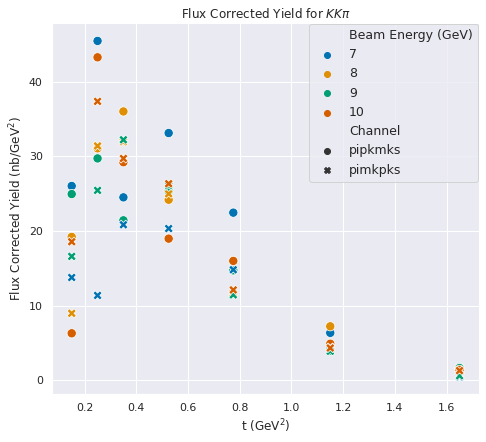

In [104]:
plot = sns.relplot(data=df, x='t_bin_middle', y='flux_corrected_yield', hue='beam_energy', style='channel', palette='colorblind', height=6, aspect=1.15, s=85, legend='full')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plot._legend.texts[0].set_text("Beam Energy (GeV)")
plot._legend.texts[5].set_text("Channel")
sns.move_legend(plot, "upper left", bbox_to_anchor=(0.5275, 0.985), fontsize=12.5, frameon=True)
plt.xlabel('t (GeV$^2$)')
plt.ylabel('Flux Corrected Yield (nb/GeV$^2$)')
plt.title(f'Flux Corrected Yield for $KK\\pi$')
plt.savefig(f'/work/halld/home/viducic/plots/cross_section/{channel}_flux_corrected_yield.png')